In [1]:
import requests
import csv
from csv import DictReader
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# below lines are important when you get KeyError: 'PROJ_LIB'
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sb.set_style('whitegrid')

## Displaying earthquakes of magnitude 4.5 or above in the last 30 days
### download the data from "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv"

In [3]:
address = '4.5_month.csv'
eq = pd.read_csv(address)
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-02-12T08:59:25.286Z,-24.1641,-176.1798,92.01,5.2,mb,NaN,90,5.296,1.32,...,2020-02-12T09:15:18.040Z,South of the Fiji Islands,earthquake,10.7,7.6,0.122,22.0,reviewed,us,us
1,2020-02-12T05:55:09.989Z,0.7902,98.9466,81.22,4.5,mb,NaN,98,1.462,0.85,...,2020-02-12T06:20:16.040Z,"73km SSW of Padangsidempuan, Indonesia",earthquake,7.3,7.8,0.127,18.0,reviewed,us,us
2,2020-02-12T00:43:19.540Z,52.6402,171.8590,10.00,4.9,mb,NaN,146,1.369,0.67,...,2020-02-12T01:02:31.040Z,"92km WSW of Attu Station, Alaska",earthquake,10.7,1.9,0.029,373.0,reviewed,us,us
3,2020-02-11T21:42:43.476Z,-20.9359,-70.7684,10.00,4.6,mwr,NaN,139,0.899,1.25,...,2020-02-12T01:06:24.938Z,"102km SW of Iquique, Chile",earthquake,4.0,1.9,0.045,47.0,reviewed,us,us
4,2020-02-11T21:04:16.649Z,4.5291,83.4764,10.00,4.7,mb,NaN,101,3.878,1.03,...,2020-02-12T08:44:21.249Z,North Indian Ocean,earthquake,8.9,1.8,0.082,45.0,reviewed,us,us


In [4]:
len(eq)

468

## Let us check the frequency of all earthquakes

In [5]:
freq = eq['mag'].value_counts()
freq

4.50    96
4.60    84
4.70    59
4.90    44
4.80    41
5.00    32
5.20    23
5.10    22
5.30    20
5.50    11
5.40     8
5.60     6
6.10     5
6.00     4
5.70     3
6.20     3
5.80     2
6.30     1
4.62     1
7.70     1
5.90     1
6.70     1
Name: mag, dtype: int64

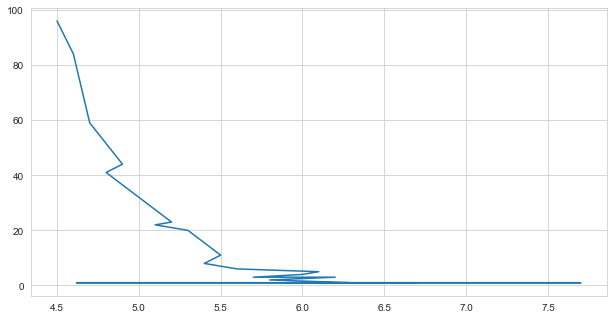

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.plot(freq)

## Below the x-axis shows the number of values in the data set which was 468
### so the first entry in data has mag of 5.2 and so on.

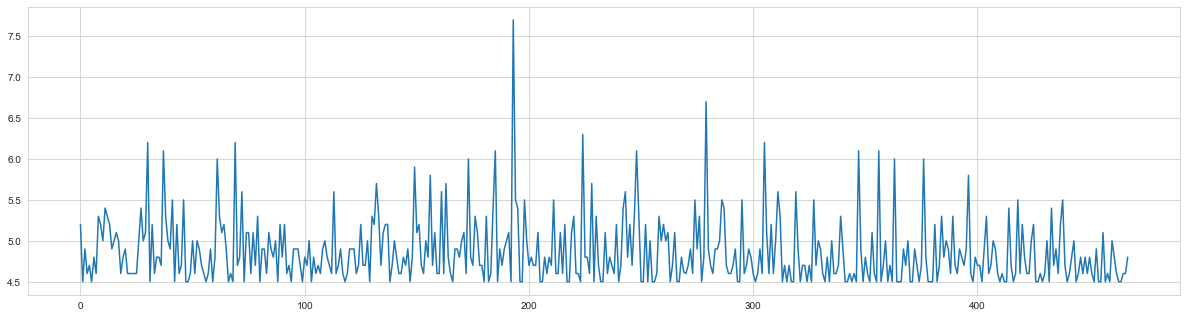

In [7]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2, 1])
ax.plot(eq['mag'])

# Now we will plot the magnitude data on world map using basemap
## We will plot the data of all the earthquakes above magnitude of 1
### download the data from 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_month.csv'

/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


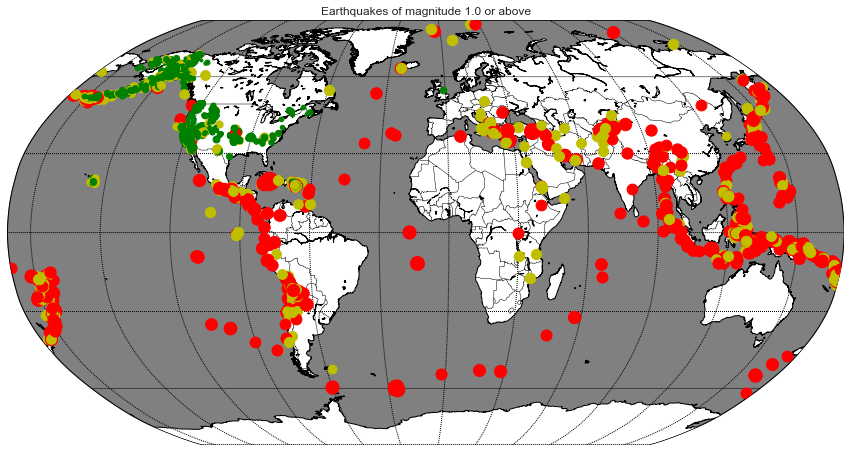

In [8]:
eq_lat, eq_lon = [], []
magnitudes = []
eq_ts = []
with open('eq_1.csv') as f:
    reader = csv.reader(f)
    
    # skip the header row
    next(reader)
    
    # here we store latitude and longitude in seperate lists
    for row in reader:
        eq_lat.append(float(row[1]))
        eq_lon.append(float(row[2]))
        magnitudes.append(float(row[4]))
        eq_ts.append(row[0])

def mk_color(magnitude):
    # red for significant earthquakes, yellow for earthquakes below 4.5 and above 3.0
    #  and green for earthquakes below 3.0
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 4.5:
        return ('yo')
    else:
        return ('ro')

plt.figure(figsize=(15,11))
my_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=-10)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = '#ffffff')
my_map.drawmapboundary(color='grey', linewidth=1, fill_color='grey')
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

mk_size = 2.4

for lon, lat, mag in zip(eq_lon, eq_lat, magnitudes):
    x,y = my_map(lon, lat)
    msize = mag * mk_size
    marker_string = mk_color(mag)
    my_map.plot(x, y, marker_string, markersize=msize)
    
plt.title('Earthquakes of magnitude 1.0 or above')

# we can save the image as png file locally to the directory we are working in
plt.savefig('eq_data.png')
plt.show()